In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

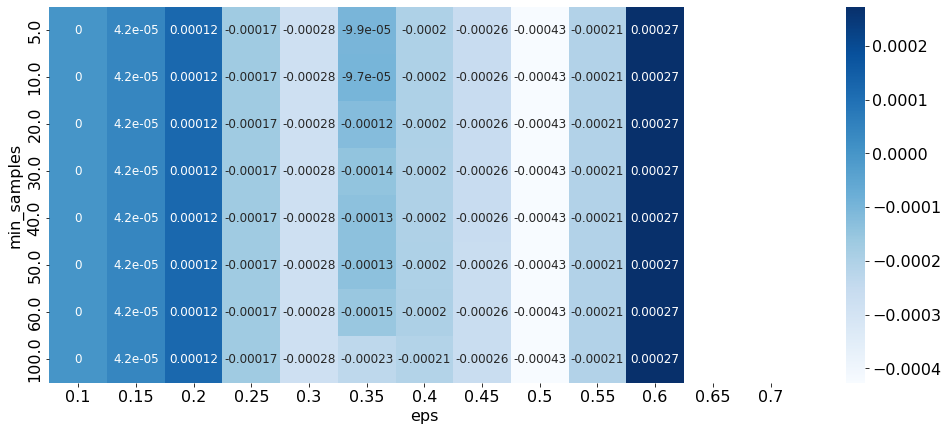

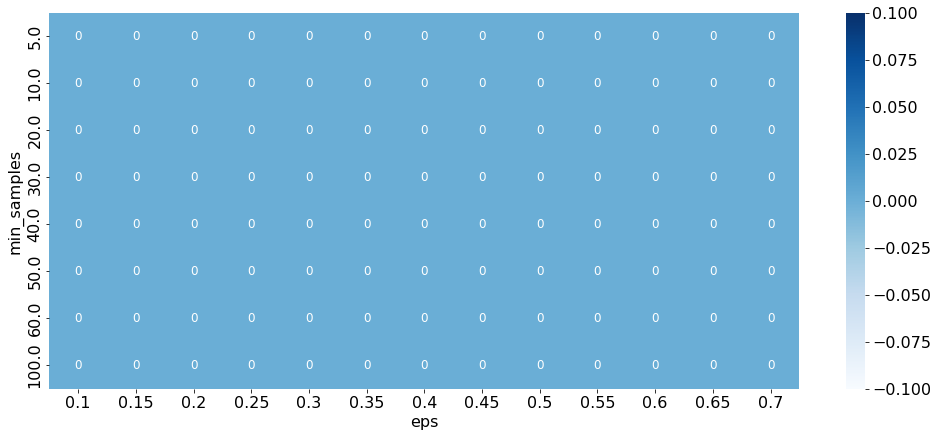

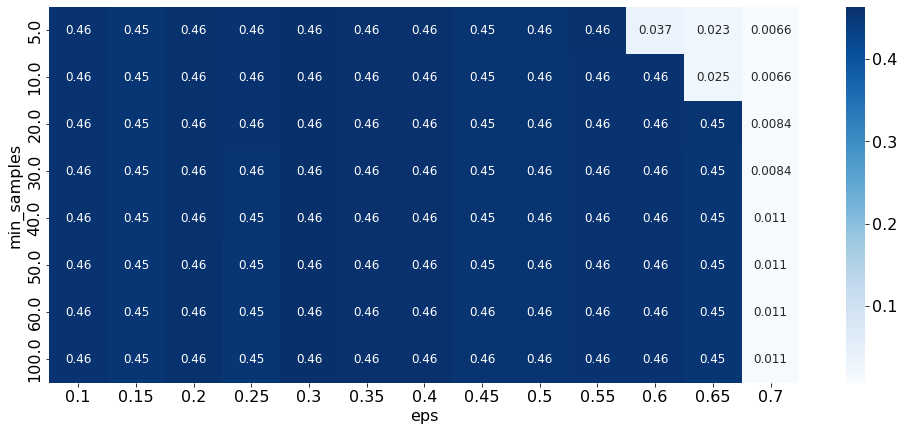

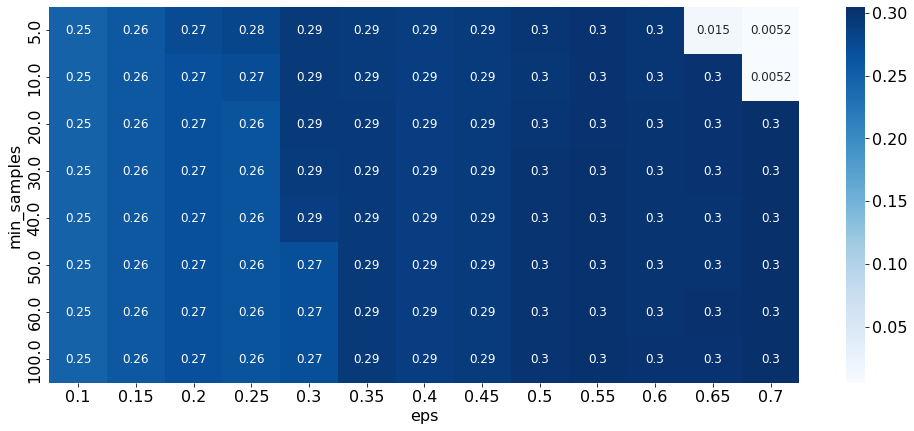

In [3]:
width, height = 14, 6
metric = 'ars'

for dataset in ['civilcomments', 'waterbirds']:
    df = pd.read_csv('../privateDemographics/results/%s/%s_clustering_results.csv' % (dataset, dataset))
    num_class = 3 if dataset == 'multinli' else 2

    group_idx = []
    for y in range(num_class):
        group_idx.append(df['Job Type'] == ('y=%d' % y))

    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=16)
    plt.rc('axes', linewidth=1)
    mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

    for y in range(num_class):
        vis_data = {}
        for _, (eps, min_samples, ars) in df[group_idx[y]][['eps', 'min_samples', metric]].iterrows():
            eps = round(eps, 2)
            if not eps in vis_data:
                vis_data[eps] = {}
            vis_data[eps][min_samples] = ars
        vis_data = pd.DataFrame(vis_data)
        vis_data = vis_data.sort_index().sort_index(axis = 1)

        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
        fig.subplots_adjust(left=.07, bottom=.1, right=1, top=0.97, wspace=0.02) #margin of the figure
        fig.set_size_inches(width, height) #exact size of the figure

        sns.heatmap(vis_data, annot=True, annot_kws={"size": 12}, ax = ax, cmap="Blues")
        ax.set_xlabel('eps')
        ax.set_ylabel('min_samples')
        plt.savefig('figures/%s_%s_y_%d.pdf' % (dataset, metric, y))

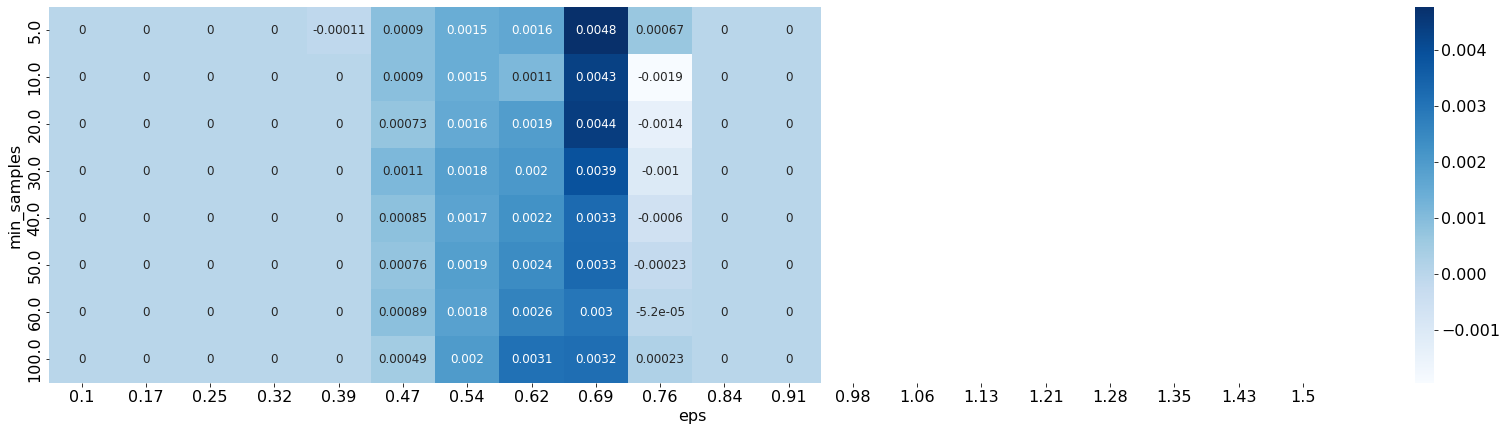

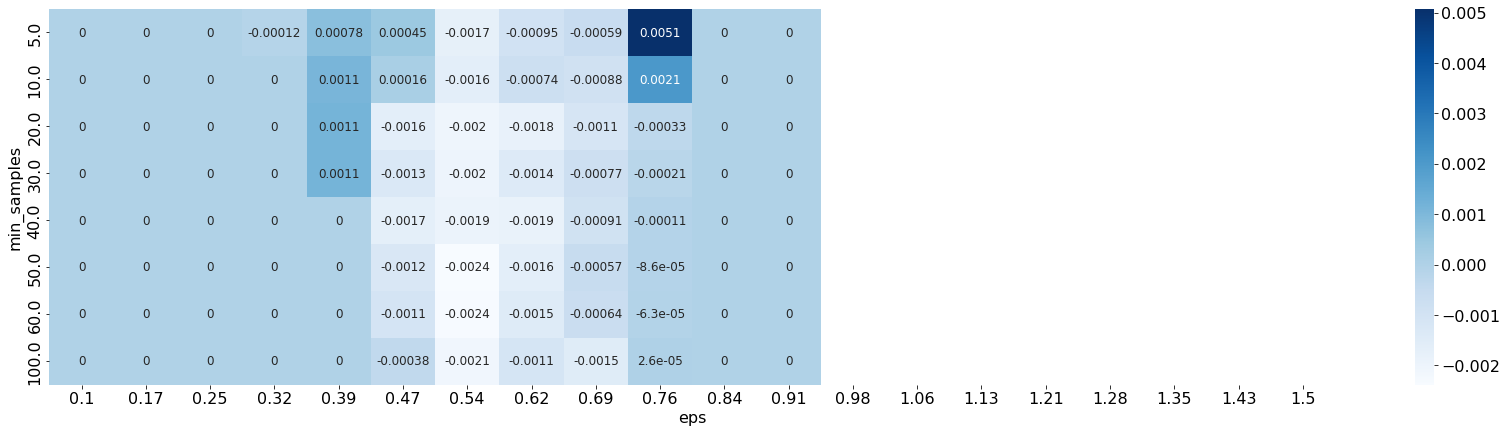

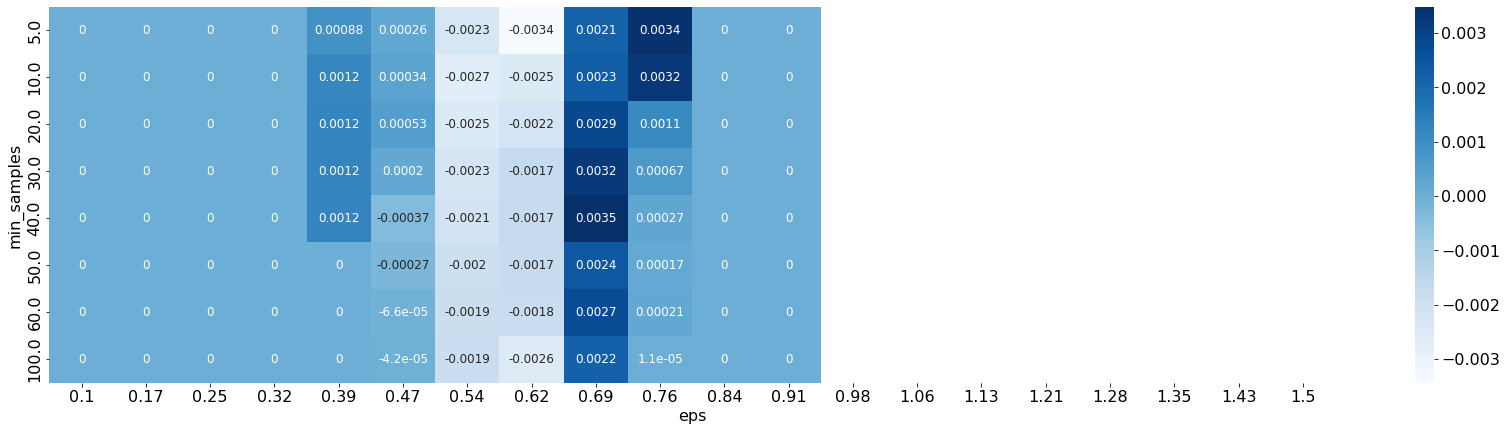

In [23]:
width, height = 24, 6
metric = 'ars'

for dataset in ['multinli']:
    df = pd.read_csv('../privateDemographics/results/%s/%s_clustering_results.csv' % (dataset, dataset))
    num_class = 3 if dataset == 'multinli' else 2

    group_idx = []
    for y in range(num_class):
        group_idx.append(df['Job Type'] == ('y=%d' % y))

    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=16)
    plt.rc('axes', linewidth=1)
    mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

    for y in range(num_class):
        vis_data = {}
        for _, (eps, min_samples, ars) in df[group_idx[y]][['eps', 'min_samples', metric]].iterrows():
            eps = round(eps, 2)
            if not eps in vis_data:
                vis_data[eps] = {}
            vis_data[eps][min_samples] = ars
        vis_data = pd.DataFrame(vis_data)
        vis_data = vis_data.sort_index().sort_index(axis = 1)

        fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
        fig.subplots_adjust(left=.07, bottom=.1, right=1, top=0.97, wspace=0.02) #margin of the figure
        fig.set_size_inches(width, height) #exact size of the figure

        sns.heatmap(vis_data, annot=True, annot_kws={"size": 12}, ax = ax, cmap="Blues")
        ax.set_xlabel('eps')
        ax.set_ylabel('min_samples')
        plt.savefig('figures/%s_%s_y_%d.pdf' % (dataset, metric, y))

In [56]:
data = df.copy().fillna(0)
data['outlier_proportion'] = data['outlier_proportion'] + data['outliers']
data = data.drop(['outliers'], axis = 1)

In [49]:
d0 = data[data['Job Type'] == 'y=0']
d0.loc[d0[(d0.num_subgroups >= 2)]['outlier_proportion'].idxmin(axis = 0)]

Name                                                    solar-breeze-3570
ID                                                               8ahr5dby
State                                                            finished
Job Type                                                              y=0
Notes                                                                   -
User                                                          yuchen-zeng
Group                                 multinli_outlier_0_group_prediction
Tags                                                                  0.0
Created                                          2022-08-10T00:44:20.000Z
Updated                                          2022-08-10T00:47:34.000Z
End Time                                         2022-08-10T00:47:34.000Z
Runtime                                                               194
Sweep                                                                 0.0
Hostname                              

In [42]:
np.unique(d0.num_subgroups)

array([0., 1., 2., 3.])

In [47]:
0.544421 + 0.455579

1.0

In [58]:
data.to_csv('multinli_clustering.csv')